## Dự báo doanh thu trong năm 2024 của 1 sản phầm B1 trong năm tiếp theo

In [1]:
# khai báo thư viện
import pandas as pd
import numpy as np
import sklearn

In [2]:
B1_path = "/content/drive/MyDrive/B1_Plan.xlsx"
B1_competitors_path = "/content/drive/MyDrive/B1_Competitors.xlsx"

#### Đọc dữ liệu

In [3]:
df_B1 = pd.read_excel(B1_path, header = 2)
df_B1_competitors = pd.read_excel(B1_competitors_path, sheet_name = "Giá trị_Lượng")


In [4]:
df_B1

,Tên sản phẩm,Quý 1,Unnamed: 2,Quý 2,Unnamed: 4,Quý 3,Unnamed: 6,Quý 4,Unnamed: 8,Quý 1.1,...,Quý 4.1,Unnamed: 16,Quý 1.2,Unnamed: 18,Quý 2.2,Unnamed: 20,Quý 3.2,Unnamed: 22,Quý 4.2,Unnamed: 24
0,B1,735,68.0022,330,30.5316,560,57.568,750,77.1,730,...,450,46.26,555,57.054,600,61.68,400,41.12,800,82.24


In [5]:
df_B1_competitors

,Lượng,2020,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,2023 Total,Lượng.1
0,NaN,Tháng 1,Tháng 2,Tháng 3,Tháng 4,Tháng 5,Tháng 6,Tháng 7,Tháng 8,Tháng 9,...,Tháng 3,Tháng 4,Tháng 5,Tháng 6,Tháng 7,Tháng 8,Tháng 9,Tháng 10,NaN,NaN
1,B1,1939043,1013651,2451126,2989985,6049315,2418846,6759353,8837352,2842175,...,2093179,1166098,3435073,1885718,1455468,3140965,3056015,3320751,21298316,130962674
2,Giá trị,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023 Total,Giá trị
3,NaN,Tháng 1,Tháng 2,Tháng 3,Tháng 4,Tháng 5,Tháng 6,Tháng 7,Tháng 8,Tháng 9,...,Tháng 3,Tháng 4,Tháng 5,Tháng 6,Tháng 7,Tháng 8,Tháng 9,Tháng 10,NaN,NaN
4,B1,1498821.429454,647526.930521,1403030.006489,2189582.624893,4124948.11674,1909533.19813,2783687.24266,3101721.04553,1304650.72199,...,1447552,764648.68,844274.7,811098,732771.86,1915573,696992,532818,8831466.38,72548474.231821


#### clean data

In [6]:
## Lấy Lượng của từng quý trong bảng B1 plan năm 2021 đến 2023
index_of_luong = [1,3,5,7,9,11,13,15,17,19,21,23]
## Lấy giá trị của từng quý trong bảng B1 plan năm 2021 đến 2023
index_of_gt = [2,4,6,8,10,12,14,16,18,20,22,24]

data_luong = df_B1.iloc[0][index_of_luong].values
data_gt = df_B1.iloc[0][index_of_gt].values

In [7]:
data_luong.shape

(12,)

In [8]:
data_gt.shape

(12,)

In [9]:
def gia_tri_tung_quy(input_theo_thang):
  reshaped_array = input_theo_thang.reshape(-1, 3)

  # Sum along the second axis (axis=1) to get the sum of each row
  sums = reshaped_array.sum(axis=1)
  return sums

In [10]:
## Lấy lượng của từng quý trong bảng B1_competitors từ 2020
data_2020 = df_B1_competitors.loc[1][1:13].values
## Lấy lượng của từng quý trong bảng B1_competitors từ 2021
data_2021= df_B1_competitors.loc[1][14:26].values
## Lấy lượng của từng quý trong bảng B1_competitors từ 2022
data_2022=df_B1_competitors.loc[1][27:39].values
## Lấy lượng của từng quý trong bảng B1_competitors từ 2023
data_2023= df_B1_competitors.loc[1][40:50].values
## Năm 2023 do không có giá trị tháng 11 và 12 nên coi như = 0
data_2023 = np.append(data_2023, [0, 0])


## Lấy giá trị của từng quý trong bảng B1_competitors từ 2020
data_2020_gt = df_B1_competitors.loc[4][1:13].values
## Lấy giá trị của từng quý trong bảng B1_competitors từ 2021
data_2021_gt = df_B1_competitors.loc[4][14:26].values
## Lấy giá trị của từng quý trong bảng B1_competitors từ 2022
data_2022_gt = df_B1_competitors.loc[4][27:39].values
## Lấy giá trị của từng quý trong bảng B1_competitors từ 2023
data_2023_gt = df_B1_competitors.loc[4][40:50].values
## Năm 2023 do không có giá trị tháng 11 và 12 nên coi như = 0
data_2023_gt = np.append(data_2023_gt, [0, 0])

## Hậu xử lí : convert thang to quy
data_2020 = gia_tri_tung_quy(data_2020)
data_2021 = gia_tri_tung_quy(data_2021)
data_2022 = gia_tri_tung_quy(data_2022)
data_2023 = gia_tri_tung_quy(data_2023)

data_2020_gt = gia_tri_tung_quy(data_2020_gt)
data_2021_gt = gia_tri_tung_quy(data_2021_gt)
data_2022_gt = gia_tri_tung_quy(data_2022_gt)
data_2023_gt = gia_tri_tung_quy(data_2023_gt)

## Lấy thông tin từ 2021 đến 2023
data_2021_to_2023_luong = np.concatenate([data_2021, data_2022, data_2023])
data_2021_to_2023_gt= np.concatenate([data_2021_gt, data_2022_gt, data_2023_gt])

In [11]:
data_2021_to_2023_gt.shape

(12,)

#### linear regresstion - chi su dung du lieu bang B1-plan

##### simple method : lấy 4 giá trị ngẫu nhiên bất kì từ bảng B1 plan liền nhau, sử dụng dữ liệu lịch sử từ 3 quý trước để dự đoán dữ liệu quý tiếp theo sử dụng mô hình linear regression

In [26]:
window_size = 4
stride = 1

# Create sliding windows
sliding_windows = [data_luong[i:i+window_size] for i in range(0, len(data_luong)-window_size+1, stride)]
result_array = np.vstack(sliding_windows)
# Display the sliding windows
print(result_array)

[[735 330 560 750]
 [330 560 750 730]
 [560 750 730 450]
 [750 730 450 600]
 [730 450 600 450]
 [450 600 450 555]
 [600 450 555 600]
 [450 555 600 400]
 [555 600 400 800]]


In [27]:
## input of model
input_model = result_array[:,:3]
## output of model
output_model = result_array[:,:3:4]

In [28]:
input_model.shape

(9, 3)

In [29]:
output_model.shape

(9, 1)

Mean Squared Error: 2.5849394142282115e-26


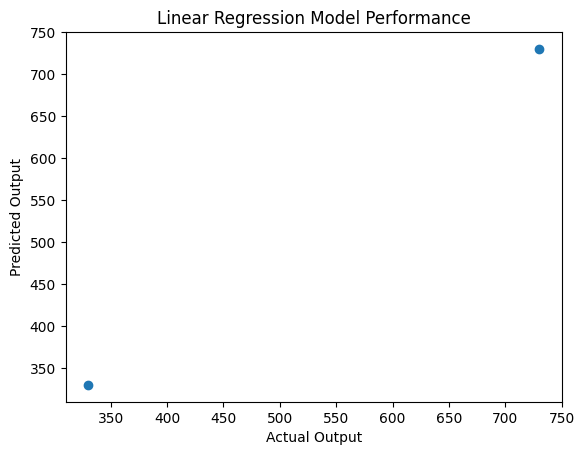

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have input and output data
# Replace X_input and y_output with your actual data
X_input = input_model  # Replace with your input data
y_output = output_model  # Replace with your output data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_input, y_output, test_size=0.2, random_state=2)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the predictions (for demonstration purposes, adjust based on your data)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Linear Regression Model Performance')
plt.show()

In [34]:
model

LinearRegression()

In [45]:
## Dự đoán doanh thu năm 2024 cho sản phẩm B1
### Quý 1 : input : doanh thu quý 2,3,4 năm 2023
input_model = np.array([[600,400,800]])
output_model_quy_1_2024 = model.predict(input_model)

In [46]:
## doanh thu du doan quy 1 2024 laf 600
## quy 2: input doanh thu quy 3,4 nam 2023 va quy 1 2024

input_model = np.array([[400,800,float(output_model_quy_1_2024)]])
output_model_quy_2_2024 = model.predict(input_model)

In [47]:
## quy 3
input_model = np.array([[800,float(output_model_quy_1_2024), float(output_model_quy_2_2024)]])
output_model_quy_3_2024 = model.predict(input_model)
## quy 4
input_model = np.array([[float(output_model_quy_1_2024),float(output_model_quy_2_2024),float(output_model_quy_3_2024)]])
output_model_quy_4_2024 = model.predict(input_model)

In [48]:
print("quy_1: ", output_model_quy_1_2024)
print("quy_2: ", output_model_quy_2_2024)
print("quy_3: ", output_model_quy_3_2024)
print("quy_4: ", output_model_quy_4_2024)

quy_1:  [[600.]]
quy_2:  [[400.]]
quy_3:  [[800.]]
quy_4:  [[600.]]


In [50]:
# visualize
data_luong_predict = np.array([float(output_model_quy_1_2024),float(output_model_quy_2_2024),float(output_model_quy_3_2024),float(output_model_quy_4_2024)])

In [51]:
data_luong_predict

array([600., 400., 800., 600.])

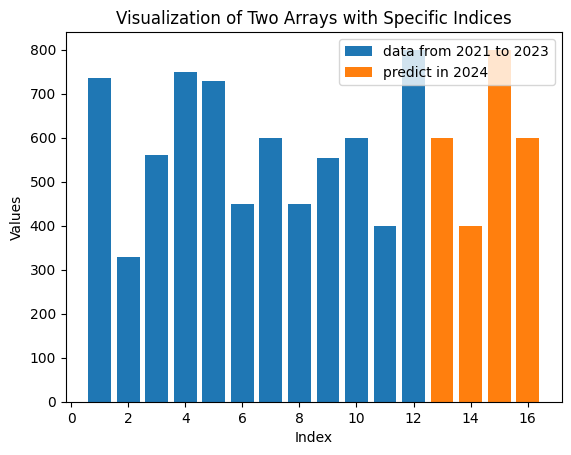

In [53]:
import matplotlib.pyplot as plt
import numpy as np


# Creating figure and axis
fig, ax = plt.subplots()

# Plotting the first array with indices 1 to 12
ax.bar(np.arange(1, 13), data_luong, label='data from 2021 to 2023')

# Plotting the second array with indices 13 to 16
ax.bar(np.arange(13, 17), data_luong_predict, label='predict in 2024')

# Adding labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.set_title('Visualization of Two Arrays with Specific Indices')
ax.legend()

# Display the plot
plt.show()

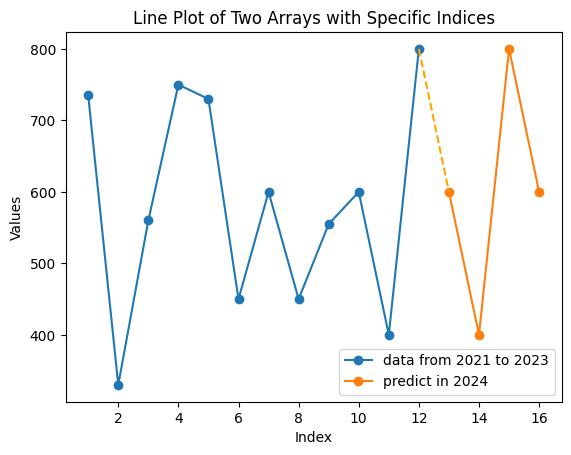

In [56]:
import matplotlib.pyplot as plt
import numpy as np


# Creating figure and axis
fig, ax = plt.subplots()

# Plotting the first array with lines and markers
ax.plot(np.arange(1, 13), data_luong, label='data from 2021 to 2023', marker='o')

# Plotting the second array with lines and markers
ax.plot(np.arange(13, 17), data_luong_predict, label='predict in 2024', marker='o')
ax.plot([12, 13], [data_luong[-1], data_luong_predict[0]], color='orange', linestyle='--')
# Adding labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.set_title('Line Plot of Two Arrays with Specific Indices')
ax.legend()

# Display the plot
plt.show()